# 支持向量机(SVM)

## 线性分类

- 观察C取值对决策面的影响

正则化参数。C值大，意味着分类器会选择一个较小的间隔，以减少训练样本上的错误分类。C值小，意味着分类器会尝试最大化间隔，允许更多的错误分类。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from sklearn import svm

In [2]:
data1 = loadmat("./exp6data/exp6data1.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X = data1["X"]
y = data1["y"]

In [4]:
X.shape, y.shape

((51, 2), (51, 1))

In [5]:
def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap="rainbow")
    plt.xlabel("x1")
    plt.ylabel("x2")

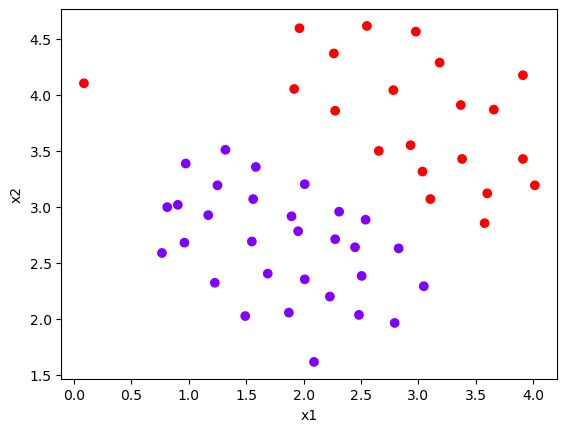

In [6]:
plotData(X, y)

In [7]:
svc1 = svm.SVC(C=1, kernel="linear")
svc1.fit(X, y.flatten())  # 得到决策面

SVC(C=1, kernel='linear')

In [8]:
svc1.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [9]:
svc1.score(X, y.flatten())  # 准确性评估

0.9803921568627451

In [10]:
X[:,0].max(), X[:,1].max(), X[:,0].min(), X[:,1].min()

(4.015, 4.6162, 0.086405, 1.6177)

In [11]:
def plotBoundary(model):
    x1_min,x1_max = -0.5, 4.5
    x2_min,x2_max = 1.0, 5.0
    xx,yy = np.meshgrid(np.linspace(x1_min,x1_max,500),
                       np.linspace(x2_min,x2_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

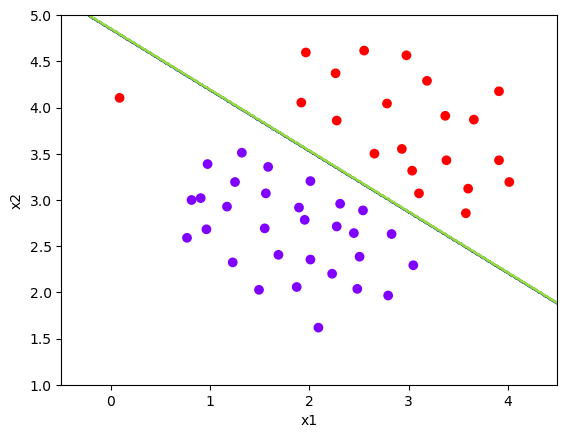

In [12]:
plotBoundary(svc1)
plotData(X, y)

In [13]:
svc100 = svm.SVC(C=100, kernel="linear")
svc100.fit(X, y.flatten())

SVC(C=100, kernel='linear')

In [14]:
svc100.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [15]:
svc100.score(X, y.flatten())

1.0

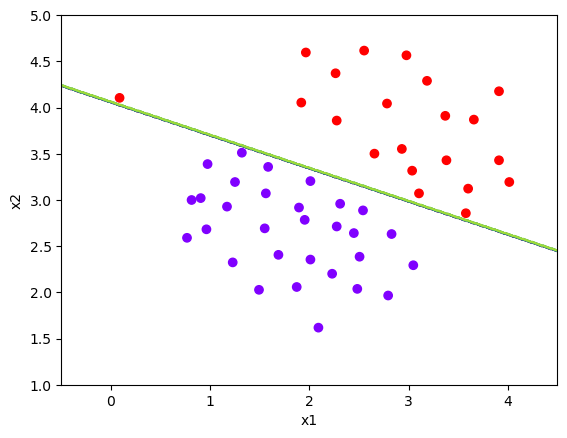

In [16]:
plotBoundary(svc100)
plotData(X, y)